In [1]:
import pandas as pd
import requests
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('clean-df.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

df2=df.copy()
df2

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Address,Time On Web,sqft lot,Condo,Multi-Family,Single Family,Townhome
0,249500,1885.0,1512.0,3.0,2.5,165.0,2,205.000000,"1321 S Christiana Ave, Chicago, IL 60623",1,3125.0,0,0,1,0
1,128250,1942.0,1520.0,4.0,2.0,84.0,1,551.138838,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1,3751.0,0,0,1,0
2,79000,1973.0,575.0,1.0,1.0,137.0,0,316.000000,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1,575.0,1,0,0,0
3,325000,1925.0,3125.0,6.0,3.0,104.0,2,175.000000,"5028 W Adams St, Chicago, IL 60644",1,3125.0,0,1,0,0
4,275000,1953.0,1893.0,4.0,2.0,145.0,2,551.138838,"639 E 100th St, Chicago, IL 60628",1,3751.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,469000,1922.0,1650.0,2.0,2.0,284.0,0,431.000000,"559 W Roscoe St Unit 2W, Chicago, IL 60657",62,1650.0,1,0,0,0
2269,249900,1905.0,1092.0,3.0,1.0,229.0,2,288.000000,"4516 N Central Ave, Chicago, IL 60630",62,4487.0,0,0,1,0
2270,249900,1908.0,1150.0,1.0,1.0,217.0,0,491.000000,"900 S Wabash Ave Apt 704, Chicago, IL 60605",120,1150.0,1,0,0,0
2271,97950,1944.0,1196.0,3.0,1.5,82.0,0,300.000000,"9942 S Luella Ave, Chicago, IL 60617",96,4961.0,0,0,1,0


In [2]:
df2.describe()

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Time On Web,sqft lot,Condo,Multi-Family,Single Family,Townhome
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,289796.492741,1950.958645,1489.698196,2.747910,1.857897,214.200176,1.005719,429.063320,45.430708,2581.744936,0.449626,0.065552,0.466344,0.018478
std,130012.774329,36.395858,660.557601,1.229865,0.702924,98.078385,0.875861,234.672922,36.658440,1552.353029,0.497565,0.247552,0.498976,0.134701
min,50000.000000,1885.000000,392.000000,1.000000,1.000000,30.000000,0.000000,100.000000,1.000000,0.230000,0.000000,0.000000,0.000000,0.000000
25%,190000.000000,1922.000000,1015.000000,2.000000,1.000000,138.000000,0.000000,244.000000,17.000000,1140.000000,0.000000,0.000000,0.000000,0.000000
50%,275000.000000,1952.000000,1300.000000,3.000000,2.000000,204.000000,1.000000,350.000000,40.000000,2936.000000,0.000000,0.000000,0.000000,0.000000
75%,375000.000000,1973.000000,1800.000000,3.000000,2.000000,284.000000,2.000000,551.138838,68.000000,3751.000000,1.000000,0.000000,1.000000,0.000000
max,600000.000000,2023.000000,3450.000000,6.000000,4.500000,743.000000,3.000000,1200.000000,200.000000,7545.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# נשתמש ברגרסיה לינארית 
X = df2.drop(['price'], axis=1)
y = df2['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


X_train_new=X_train.drop(['Address'], axis=1)
X_test_new=X_test.drop(['Address'], axis=1)

regressor = LinearRegression()
regressor.fit(X_train_new, y_train)

y_pred_new = regressor.predict(X_test_new)

print('R2 on train set:',regressor.score(X_train_new, y_train))
print('R2 on test set:',regressor.score(X_test_new, y_test))
mse = mean_squared_error(y_test, y_pred_new)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

R2 on train set: 0.8701787351674446
R2 on test set: 0.8944195369988163
RMSE: 43824.75764357163


In [12]:
#יצרנו דאטה פריים בה שמנו את המחירים החזויים מול המחירים האמיתיים ואת ההפרש שיניהם ואת הפרמטרים עם הקורלציה הכי גבוהה 
resDF=pd.DataFrame({"address":X_test['Address'],"Actual_Price":y_test,"Predicted_Price":y_pred_new,'sqft':X_test['sqft'],'year built':X_test['year built'],'beds':X_test['beds'],'bathroom':X_test['bathroom'],"Actual":y_test,"Predicted":y_pred_new})
resDF["diffrence"]=abs(resDF["Actual_Price"]-resDF["Predicted_Price"])
resDF.sort_values(by=['diffrence'], ascending=True, inplace = True)
resDF[resDF["diffrence"]<10000]

,address,Actual_Price,Predicted_Price,sqft,year built,beds,bathroom,Actual,Predicted,diffrence
333,"1321 S Christiana Ave, Chicago, IL 60623",249500,249590.728459,1512.0,1885.0,3.0,2.5,249500,249590.728459,90.728459
891,"3807 N Linder Ave Unit 1, Chicago, IL 60641",185000,184853.570294,857.0,1923.0,2.0,1.0,185000,184853.570294,146.429706
1412,"3148 S Wells St Unit 2, Chicago, IL 60616",344900,344679.266267,1275.0,2007.0,2.0,2.0,344900,344679.266267,220.733733
1122,"3500 N Keating Ave, Chicago, IL 60641",349500,350257.641689,1473.0,1912.0,4.0,2.5,349500,350257.641689,757.641689
529,"9237 S Peoria St, Chicago, IL 60620",239900,240831.372930,1175.0,1947.0,2.0,2.0,239900,240831.372930,931.372930
...,...,...,...,...,...,...,...,...,...,...
1875,"5915 W Gunnison St Apt 4G, Chicago, IL 60630",147500,137971.232466,800.0,1970.0,1.0,1.0,147500,137971.232466,9528.767534
921,"4604 S Kilpatrick Ave, Chicago, IL 60632",260000,250287.131797,1061.0,1959.0,3.0,1.0,260000,250287.131797,9712.868203
1696,"4942 S Loomis St, Chicago, IL 60609",239900,230010.242528,1800.0,2006.0,3.0,2.0,239900,230010.242528,9889.757472
2157,"616 E 46th St Apt 2, Chicago, IL 60653",300000,290056.801850,1480.0,1907.0,3.0,2.0,300000,290056.801850,9943.198150


In [6]:
print(X_test)

      year built    sqft  beds  bathroom  price_sqft  grage  HOA Fees  \
979       1894.0  3049.0   2.0       2.0        56.0      2     300.0   
633       2006.0  2200.0   5.0       4.0       154.0      0     200.0   
478       1903.0  2263.0   6.0       3.0       141.0      0     300.0   
69        1962.0  2038.0   3.0       3.0       215.0      0     487.0   
547       1997.0  1300.0   2.0       2.0       346.0      0     197.0   
...          ...     ...   ...       ...         ...    ...       ...   
2069      1932.0  3101.0   2.0       2.0       129.0      2     288.0   
1687      1959.0   902.0   2.0       1.5       344.0      1     250.0   
1489      1885.0  3049.0   5.0       2.0       189.0      2     300.0   
1455      1914.0  1246.0   4.0       1.0       193.0      2     200.0   
1498      1918.0  3049.0   4.0       2.0        49.0      0     898.0   

                                         Address  Time On Web  sqft lot  \
979       8815 S Exchange Ave, Chicago, IL 60617

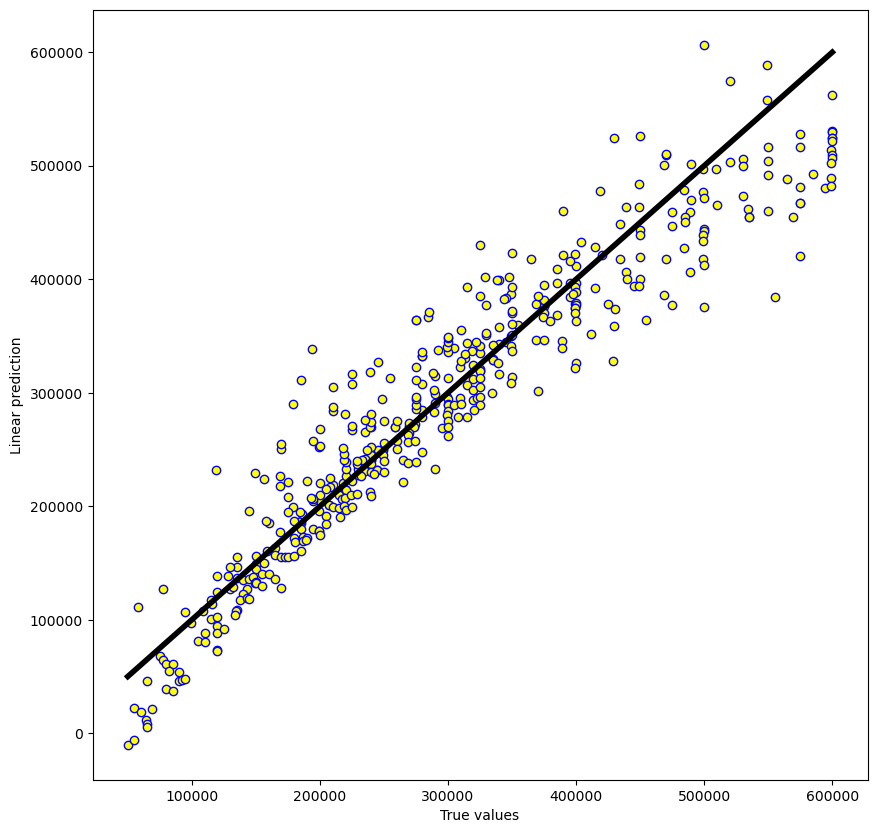

In [7]:
#גרף סקאטר פלוט שמראה את הערכים האמיתיים מול חזויים 
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(resDF['Actual_Price'], resDF['Predicted_Price'], color='yellow', edgecolors='blue')
ax.plot([resDF['Actual_Price'].min(), resDF['Actual_Price'].max()], [resDF['Actual_Price'].min(), resDF['Actual_Price'].max()], "k", lw=4)
ax.set_xlabel("True values")
ax.set_ylabel("Linear prediction")
plt.show()

,address,Actual_Price,Predicted_Price
333,"1321 S Christiana Ave, Chicago, IL 60623",249500,249590.728459
891,"3807 N Linder Ave Unit 1, Chicago, IL 60641",185000,184853.570294
1412,"3148 S Wells St Unit 2, Chicago, IL 60616",344900,344679.266267
1122,"3500 N Keating Ave, Chicago, IL 60641",349500,350257.641689
529,"9237 S Peoria St, Chicago, IL 60620",239900,240831.372930
1658,"9237 S Peoria St, Chicago, IL 60620",239900,240857.126376
1285,"6550 S Perry Ave, Chicago, IL 60621",269900,270865.156630
1523,"6700 S South Shore Dr Apt 12K, Chicago, IL 60649",108500,107506.167287
1374,"2018 N Spaulding Ave Apt 1W, Chicago, IL 60647",149900,148876.961338
768,"830 N Fairfield Ave, Chicago, IL 60622",350000,351059.212315


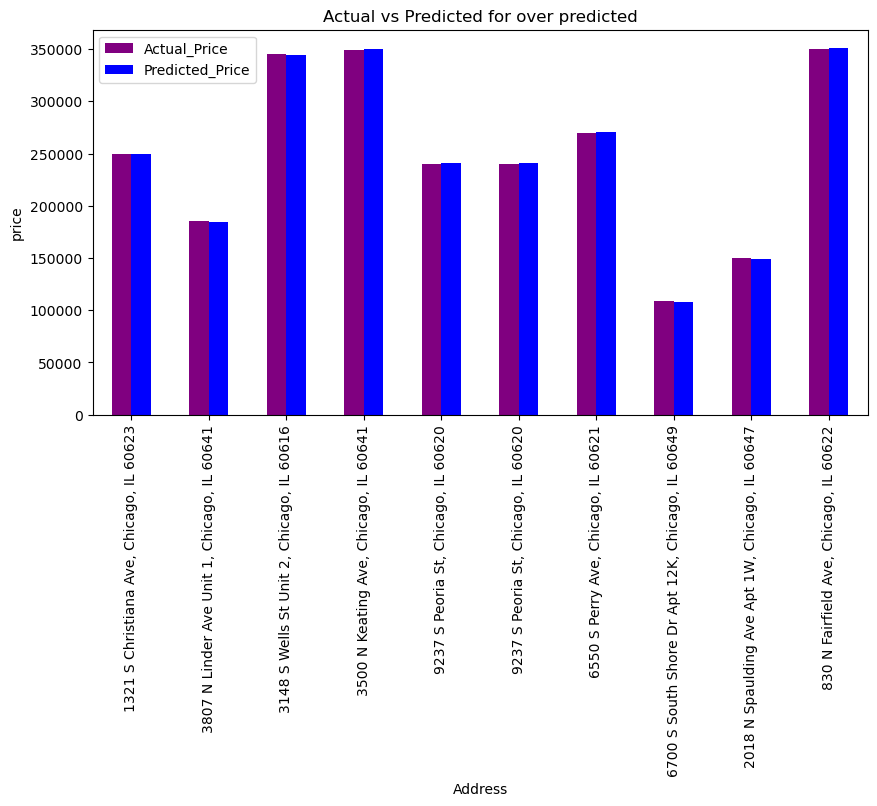

In [10]:
#החיזויים הכי מדוייקים
viz_df = resDF[['address','Actual_Price','Predicted_Price']]
viz_df.head(10).plot(kind='bar', x='address', figsize=(10,5), color = ['purple','blue'])
plt.title('Actual vs Predicted for over predicted')
plt.xlabel('Address')
plt.ylabel('price')
viz_df.head(10)

,address,Actual_Price,Predicted_Price
789,"1850 N Clark St Apt 510, Chicago, IL 60614",179000,289730.053393
582,"11336 S Forest Ave, Chicago, IL 60628",119000,231977.471001
667,"1532 W Fry St Apt 3, Chicago, IL 60642",594500,480631.908941
2040,"5034 N Tripp Ave, Chicago, IL 60630",569000,454417.376310
791,"7152 N Mason Ave, Chicago, IL 60646",599000,482290.217684
1521,"2640 W 23rd Pl, Chicago, IL 60608",499900,375718.988708
489,"9039 S Cornell Ave, Chicago, IL 60617",185000,311455.943428
1971,"6922 S Jeffery Blvd Apt 7N, Chicago, IL 60649",194000,338619.250148
1489,"932 S Leavitt St, Chicago, IL 60612",574900,420095.794273
379,"3127 N Elston Ave, Chicago, IL 60618",554900,384088.944988


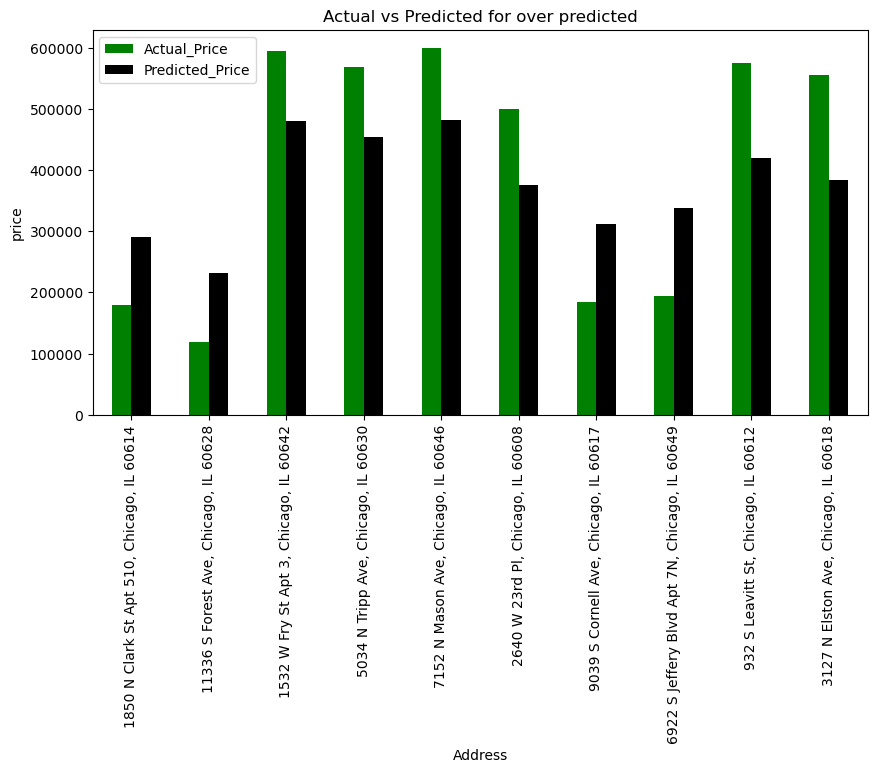

In [9]:
#החיזויים הכי פחות מדוייקים 
viz_df = resDF[['address','Actual_Price','Predicted_Price']]
viz_df.tail(10).plot(kind='bar', x='address', figsize=(10,5), color = ['green','black'])
plt.title('Actual vs Predicted for under predicted')
plt.xlabel('Address')
plt.ylabel('price')
viz_df.tail(10)